In [2]:
import pandas as pd
import numpy as np

df_tags = pd.read_csv('../data/raw/ml-25m/tags.csv')
df_gscores = pd.read_csv('../data/raw/ml-25m/genome-scores.csv')
df_gtags = pd.read_csv('../data/raw/ml-25m/genome-tags.csv')
df_links = pd.read_csv('../data/raw/ml-25m/links.csv')
df_movies = pd.read_csv('../data/raw/ml-25m/movies.csv')
df_ratings = pd.read_csv('../data/raw/ml-25m/ratings.csv')

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


All genres of a movie are displayed in one column. This is not good for data analysis and machine learning, <br>
thus we create new columns according to all genres, and assign 1 if a movie is asociated with that genre and 0 if not.

<div class="alert alert-block alert-info"><b>Info:</b> The next cell has a runtime of 1-2 minutes.</div>

In [4]:
# create DataFrame with binary genre columns
#df_movies['column_new_1'], df_movies['column_new_2'], df_movies['column_new_3'] = [np.nan, 'dogs', 3]
#df_movies.drop(['column_new_1','column_new_2','column_new_3'], axis=1, inplace=True)

# list of unique genres form column 'genres'
genres = []
# iterate over whole column 'genres'
for i in df_movies.genres:
    # split unique genres in column separated by '|' and write in list
    g_list = i.split('|')
    # iterate over list
    for g in g_list:
        # check if entry already is in list genres, append if not
        if g not in genres:
            genres.append(g)

# sort list in alpahbetica order
genres.sort()

# add columns 'genre_name' and instantiate with 0s
for i in genres:
    df_movies[i] = 0

# check for genre if it is applicable for a movie and set respective column to 1
# iterate over df_movies, retaining the index
for index, row in df_movies.iterrows():
    # split unique genres in column separated by '|' and write in list
    g_list = df_movies['genres'].loc[index].split('|')
    # iterate over list
    for g in g_list:
        # change the entry of the respective column in the row with index to 1 to indicate that this genre applies to the movie
        df_movies.loc[index, g] = 1

# rename the column '(no genres listed)' so it has no spaces
df_movies.rename(columns={'(no genres listed)':'no_genre_listed'}, inplace=True)

This is what the new df_movies looks like:

In [5]:
df_movies.head()

,movieId,title,genres,no_genre_listed,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

AttributeError: 'Axes' object has no attribute 'xticklabels'

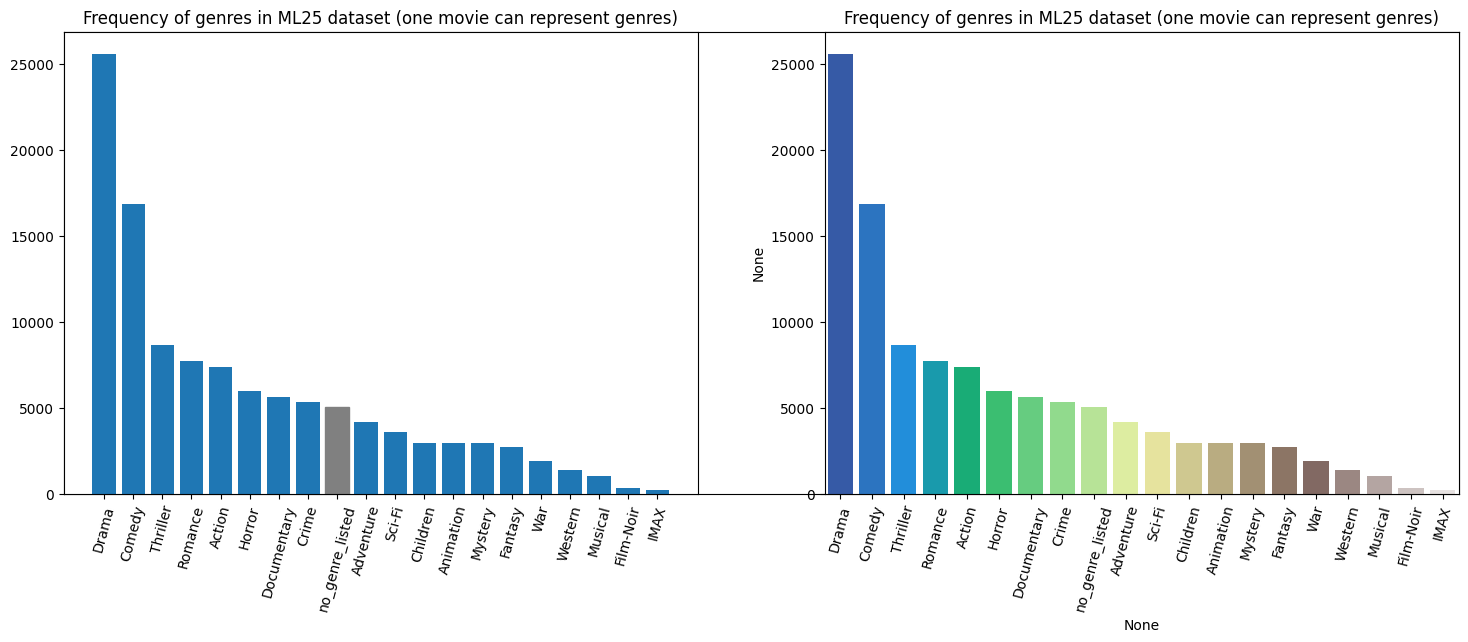

In [150]:
frequency_genres = df_movies.iloc[:,3:].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(18, 6))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.subplot(121)
plt.bar(frequency_genres.index, frequency_genres)[8].set_color('gray')
plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
plt.xticks(rotation=75)
plt.subplot(122)
sns.barplot(x = frequency_genres.index, y = frequency_genres, hue = frequency_genres.index, palette='terrain')
plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
plt.xticks(rotation=75)
ax.xticklabels=[];
ax.tick_params(axis='x', labelrotation=75) # was needed for sns plot only


<code style="background:yellow;color:black">How to remove axis label 'None' in sns plot?</code>

In [38]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [45]:
# calculate average rating of each movie
rating_avg = df_ratings.drop(['userId','timestamp'], axis=1).groupby('movieId').mean()
rating_avg.rename(columns={'rating':'rating_avg'}, inplace=True)
rating_avg.head()

,rating_avg
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


<div class="alert alert-block alert-info"><b>Info:</b> The next cell has a runtime of 5+ minutes.</div>

<code style="background:yellow;color:black">Is it ok to replace NaNs in rating_avg with mean?<br>
Is there a better/more efficient way of iterating over DataFrames?</code>

In [151]:
import sys
# join df_movies and average rating
genre_ratings = df_movies.drop(['title','genres'], axis=1).merge(right=rating_avg, on = 'movieId', how = 'left')
print('The column \'rating_avg\' does contain %i missing values and is of type %s.' % (genre_ratings.rating_avg.isna().sum(), genre_ratings.rating_avg.dtypes))
# replace NaNs with mean or drop NaNs? => replace
mean = genre_ratings.rating_avg.mean()
print('The missing values are replaced with the mean rating which is %.2f.' % mean)
#genre_ratings.rating_avg.fillna(mean, inplace=True) # throws warning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method
genre_ratings.fillna({'rating_avg':mean}, inplace=True) # alternative 1
#genre_ratings.rating_avg = genre_ratings.rating_avg.fillna(mean) # alternative 2

# casting all columns to float so they can hold average rating which is float
genre_ratings = genre_ratings.astype('float64')
#display(genre_ratings.head())
#genre_ratings.info()
#sys.exit()
#display(genre_ratings.head())
#for column in genre_ratings:
#    if column != 'movieId' and column != 'rating_avg':
#        for index, row in genre_ratings.iterrows():
#            genre_ratings.loc[index, column] *= genre_ratings.loc[index, 'rating_avg']
#genre_ratings.head()

for column in genre_ratings:
    if column != 'movieId' and column != 'rating_avg':
        genre_ratings[column] = genre_ratings[column] * genre_ratings['rating_avg']

The column 'rating_avg' does contain 3376 missing values and is of type float64.
The missing values are replaced with the mean rating which is 3.07.


In [152]:
genre_ratings.head()

,movieId,no_genre_listed,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_avg
0,1.0,0.0,0.0,3.893708,3.893708,3.893708,3.893708,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.893708
1,2.0,0.0,0.0,3.251527,0.000000,3.251527,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.251527
2,3.0,0.0,0.0,0.000000,0.000000,0.000000,3.142028,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,3.142028,0.0,0.0,0.0,0.0,3.142028
3,4.0,0.0,0.0,0.000000,0.000000,0.000000,2.853547,0.0,0.0,2.853547,...,0.0,0.0,0.0,0.0,2.853547,0.0,0.0,0.0,0.0,2.853547
4,5.0,0.0,0.0,0.000000,0.000000,0.000000,3.058434,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.058434


In [99]:
genre_ratings_agg = genre_ratings.drop(['movieId','rating_avg'], axis=1)
# replace 0s so they do not influence the average
genre_ratings_agg = genre_ratings_agg.replace({0:np.nan})
genre_ratings_agg = genre_ratings_agg.mean()
genre_ratings_agg

no_genre_listed    3.050835
Action             2.934973
Adventure          3.015595
Animation          3.100962
Children           3.033952
Comedy             3.043310
Crime              3.091499
Documentary        3.374056
Drama              3.174201
Fantasy            3.021986
Film-Noir          3.315346
Horror             2.667807
IMAX               3.252121
Musical            3.195997
Mystery            3.047038
Romance            3.143034
Sci-Fi             2.768572
Thriller           2.949208
War                3.236795
Western            3.033679
dtype: float64

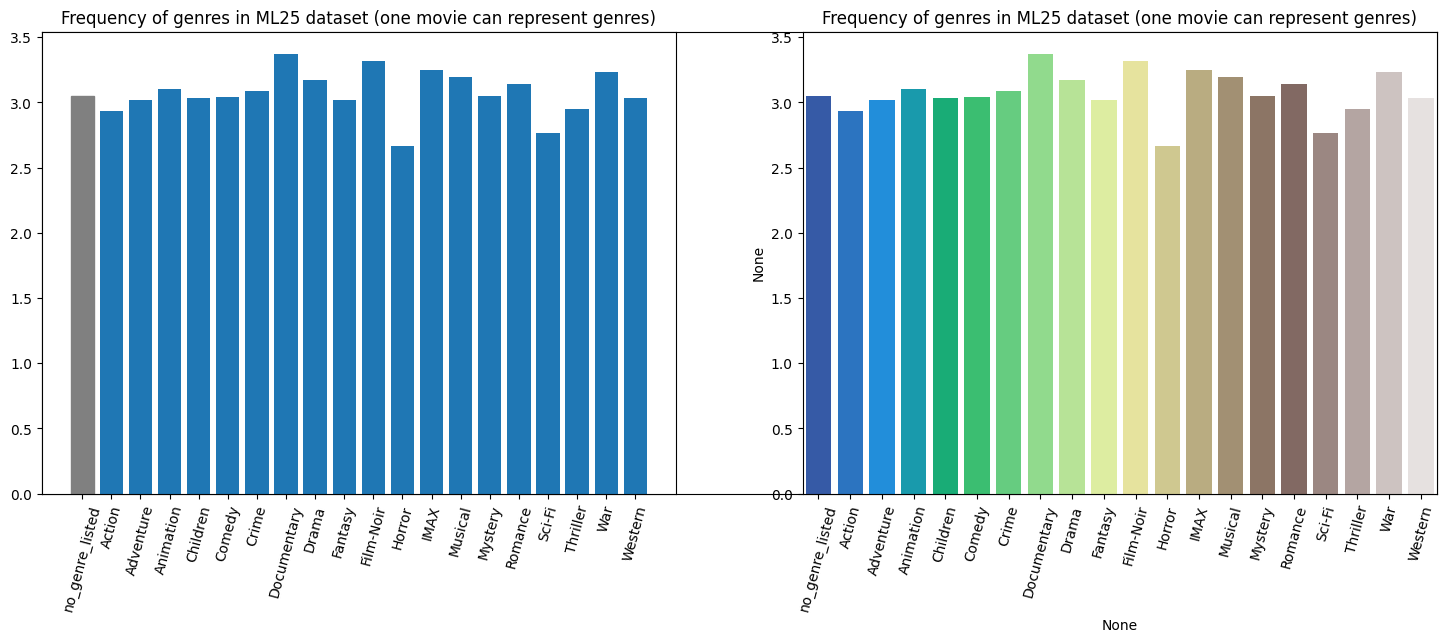

In [106]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.subplot(121)
plt.bar(genre_ratings_agg.index, genre_ratings_agg)[0].set_color('gray')
plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
plt.xticks(rotation=75)
plt.subplot(122)
sns.barplot(x = genre_ratings_agg.index, y = genre_ratings_agg, hue = genre_ratings_agg.index, palette='terrain')
plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
plt.xticks(rotation=75);

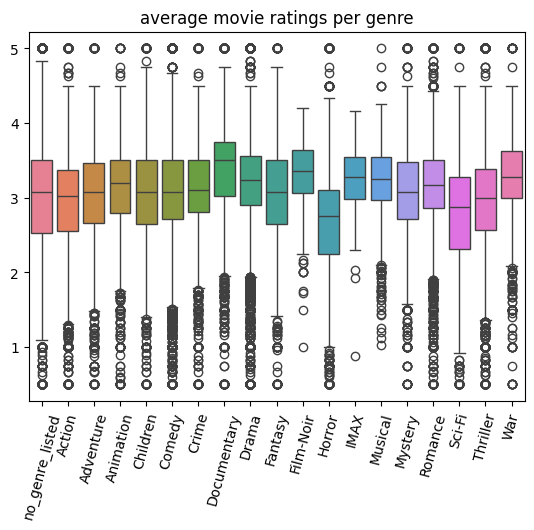

In [140]:
#test = genre_ratings.replace({0:np.nan})
#sns.boxplot(test.iloc[:,1:-2])
sns.boxplot(genre_ratings.replace({0:np.nan}).iloc[:,1:-2])
plt.title('average movie ratings per genre')
plt.xticks(rotation=75);


<div class="alert alert-block alert-warning"><b>Warning:</b> matplotlib does not handle NaNs in boxplots well (see example below).</div>

,action,drama,thriller
0,4,NaN,1
1,4,2.0,1
2,0,3.0,3
3,5,4.0,5
4,3,NaN,5


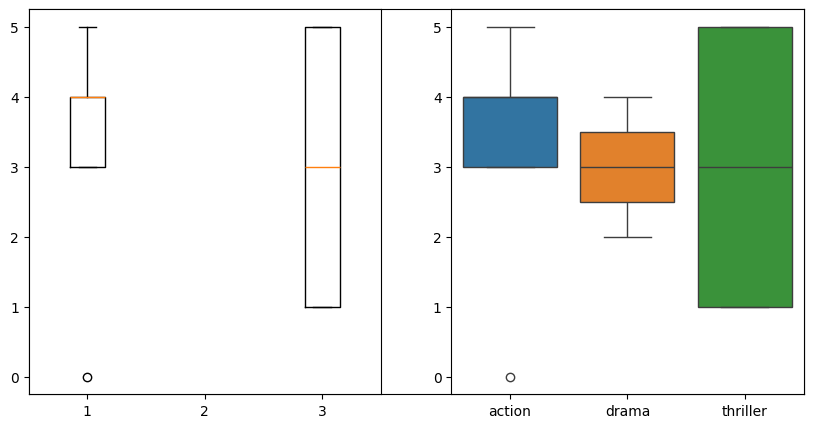

In [135]:
df = pd.DataFrame({'action': [4,4,0,5,3], 'drama':[np.nan,2,3,4,np.nan],'thriller':[1,1,3,5,5]})
display(df)
fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.subplot(121)
plt.boxplot(df)
plt.subplot(122)
sns.boxplot(df);

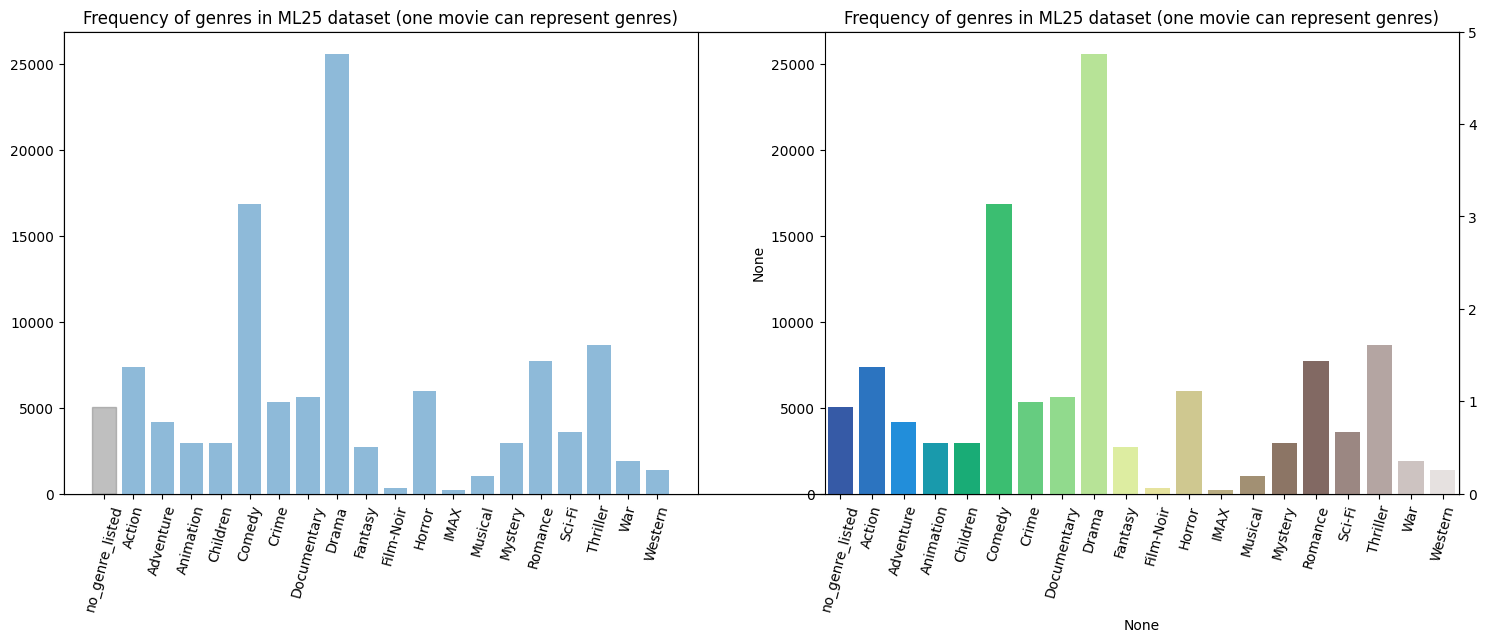

In [149]:
frequency_genres = df_movies.iloc[:,3:].sum() #.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(18, 6))
ax2 = ax.twinx()

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.subplot(121)
plt.bar(frequency_genres.index, frequency_genres, alpha=0.5)[0].set_color('gray')
plt.bar(genre_ratings_agg.index, genre_ratings_agg)[0].set_color('gray')
plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
plt.xticks(rotation=75)
ax2.set_ylim(0, 5)
plt.subplot(122)
sns.barplot(x = frequency_genres.index, y = frequency_genres, hue = frequency_genres.index, palette='terrain')
plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
plt.xticks(rotation=75)
ax.xticklabels=[];
ax.tick_params(axis='x', labelrotation=75) # was needed for sns plot only

In [96]:
#!jupyter --version
#from tqdm.notebook import *
#count = np.arange(50)
#for c in tqdm_notebook(count):
#    print(c**c)